# Import libraries

In [ ]:
#Import libraries

!pip install numpy pandas yfinance matplotlib

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching data

In [ ]:
#Stock tickers and time period (5 years)
#Data for Apple, Microsoft, Amazon, Google, and Tesla
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA']

#The start and end dates
endDate = pd.to_datetime('today')
startDate = endDate - pd.DateOffset(years=5)

In [ ]:
#Fetching data from Yahoo Finance

getData = yf.download(stocks, start=startDate, end=endDate)
stockData = getData['Close'].dropna()

stockData.head()

/tmp/ipython-input-2875422953.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  getData = yf.download(stocks, start=startDate, end=endDate)
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2020-09-14,112.212730,155.148499,75.447693,196.952332,139.873337
2020-09-15,112.387833,157.806503,76.548164,200.183594,149.919998
2020-09-16,109.070854,153.904999,75.528145,196.607132,147.253326
2020-09-17,107.329689,150.436493,74.268265,194.555252,141.143326
2020-09-18,103.925156,147.745499,72.503334,192.139023,147.383331


# Calculations on daily returns

In [ ]:
#Calculate daily returns

returns = stockData.pct_change().dropna()

returns.head()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2020-09-15,0.001560,0.017132,0.014586,0.016406,0.071827
2020-09-16,-0.029514,-0.024723,-0.013325,-0.017866,-0.017787
2020-09-17,-0.015964,-0.022537,-0.016681,-0.010436,-0.041493
2020-09-18,-0.031720,-0.017888,-0.023764,-0.012419,0.044210
2020-09-21,0.030326,0.001882,-0.019747,0.010729,0.016375


In [ ]:
#Mean daily returns and the Covariance Matrix

returnsAvg = returns.mean()

#Covariance matrix of the daily returns
covMatrix = returns.cov()

covMatrix, returnsAvg

(Ticker      AAPL      AMZN      GOOG      MSFT      TSLA
 Ticker                                                  
 AAPL    0.000329  0.000237  0.000206  0.000195  0.000347
 AMZN    0.000237  0.000495  0.000275  0.000249  0.000380
 GOOG    0.000206  0.000275  0.000380  0.000216  0.000302
 MSFT    0.000195  0.000249  0.000216  0.000271  0.000268
 TSLA    0.000347  0.000380  0.000302  0.000268  0.001504,
 Ticker
 AAPL    0.000750
 AMZN    0.000554
 GOOG    0.001117
 MSFT    0.000894
 TSLA    0.001576
 dtype: float64)

# Monte Carlo Simulation

In [ ]:
#Monte Carlo Simulation

#Number of simulations
simNum = 1000


#Number of trading days
tradingDays = 100

initialPortfolio = 10000

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

assetsLen = len(stockData.columns)

portfolioReturns = np.zeros((tradingDays, simNum))

for i in range(simNum):
    randDailyReturns = np.random.multivariate_normal(returnsAvg, covMatrix, tradingDays)
    simDailyReturns = np.dot(randDailyReturns, weights)
    cumReturns = np.cumprod(1 + simDailyReturns)
    portfolioReturns[:, i] = cumReturns

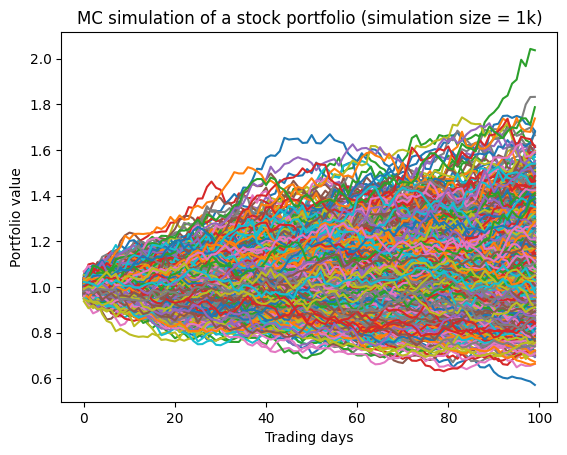

Final Simulation Results
Mean Expected Portfolio Value: $10,978.08
95% Confidence Interval (Worst Case): $8,038.62
95% Confidence Interval (Best Case): $14,668.20


In [ ]:
#Visualizing the results

plt.plot(portfolioReturns)
plt.title('MC simulation of a stock portfolio (simulation size = 1k)')
plt.xlabel('Trading days')
plt.ylabel('Portfolio value')
plt.show()

#Analysis and risk assessment

finalValues = portfolioReturns[-1, :]

finalValuesMean = finalValues.mean()

var95 = np.percentile(finalValues, 5)
best95 = np.percentile(finalValues, 95)

print("Final Simulation Results")
print(f"Mean Expected Portfolio Value: ${finalValuesMean*initialPortfolio:,.2f}")
print(f"95% Confidence Interval (Worst Case): ${var95*initialPortfolio:,.2f}")
print(f"95% Confidence Interval (Best Case): ${best95*initialPortfolio:,.2f}")

# Portfolio optimization

In [ ]:
#Portfolio optimization

#Number of portfolio
numPortfolios = 1000

returnsAll = np.zeros(numPortfolios)
volatilityAll = np.zeros(numPortfolios)
weightsAll = np.zeros((numPortfolios, assetsLen))

for i in range(numPortfolios):
    weights = np.random.random(assetsLen)
    weights /= np.sum(weights)

    returnList = []

    for j in range(tradingDays):
        randDailyReturns = np.random.multivariate_normal(returnsAvg, covMatrix)
        simDailyReturns = np.dot(randDailyReturns, weights)
        returnList.append(simDailyReturns)

    DailyReturns = np.array(returnList)
    cumReturns = np.cumprod(1 + DailyReturns)
    ar = cumReturns[-1] ** (1 / tradingDays) - 1
    arVol = np.std(DailyReturns) * np.sqrt(tradingDays)

    returnsAll[i] = ar
    volatilityAll[i] = arVol
    weightsAll[i, :] = weights

Optimal portfolio weights:
  AAPL: 13.79%
  MSFT: 21.53%
  AMZN: 25.76%
  GOOG: 21.16%
  TSLA: 17.75%

Optimal Annualized Return: 0.61%
Optimal Annualized Volatility: 15.38%
Optimal Sharpe Ratio: 0.04


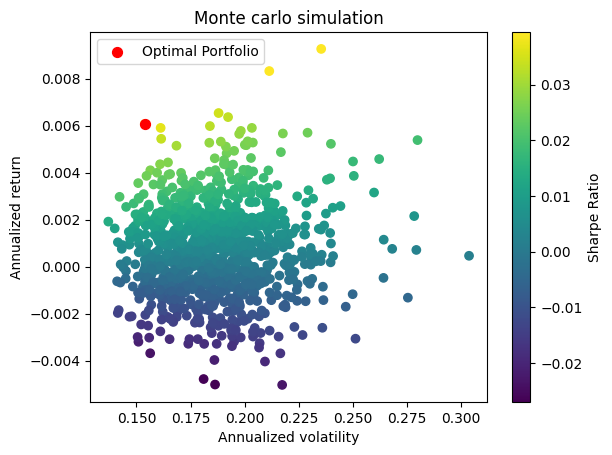

In [ ]:
#Analysis and visualization

sharpe = returnsAll / volatilityAll

optpx = sharpe.argmax()

optw = weightsAll[optpx]
optr = returnsAll[optpx]
optvol = volatilityAll[optpx]

print("Optimal portfolio weights:")
for i in range(len(stocks)):
    print(f"  {stocks[i]}: {optw[i]:.2%}")
print(f"\nOptimal Annualized Return: {optr:.2%}")
print(f"Optimal Annualized Volatility: {optvol:.2%}")
print(f"Optimal Sharpe Ratio: {sharpe[optpx]:.2f}")

plt.scatter(volatilityAll, returnsAll, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.title('Monte carlo simulation')
plt.xlabel('Annualized volatility')
plt.ylabel('Annualized return')

plt.scatter(optvol, optr, color='red', marker='.', s=200, label='Optimal Portfolio')
plt.legend()

plt.show()